In this notebook, we will test Ridge Classifier which is acting like Logistic Classifier but with regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.metrics import classification_metrics
from sklearn.linear_model import RidgeClassifier
from scripts.data_load import preprocess_data
import seaborn as sns

sns.set(palette="colorblind")
%matplotlib inline

In [2]:
feature_transformer, (X_train, y_train), (X_val, y_val), (X_test, y_test) = preprocess_data()

Let's see what would be off-shelf results from Ridge Classfier


In [3]:
clf = RidgeClassifier()
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
naive_results = classification_metrics(y_val, y_val_pred)
naive_results

{'accuracy_score': 0.8818847500795924,
 'precision_score': np.float64(0.8826530612244898),
 'recall_score': np.float64(0.8809675366008911),
 'f1_score': np.float64(0.8818094934692577)}

Let's analyzer how regularization strength affects train vs validation results

In [10]:
reg_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

train_accuracy_history = []
val_accuracy_history = []

train_precision_history = []
val_precision_history = []

train_recall_history = []
val_recall_history = []

train_f1score_history = []
val_f1score_history = []

for reg in reg_alphas:
    clf = RidgeClassifier(alpha=reg)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    train_results = classification_metrics(y_train, y_train_pred)
    val_results = classification_metrics(y_val, y_val_pred)

    train_accuracy_history.append(train_results['accuracy_score'])
    val_accuracy_history.append(val_results['accuracy_score'])

    train_precision_history.append(train_results['precision_score'])
    val_precision_history.append(val_results['precision_score'])

    train_recall_history.append(train_results['recall_score'])
    val_recall_history.append(val_results['recall_score'])

    train_f1score_history.append(train_results['f1_score'])
    val_f1score_history.append(val_results['f1_score'])

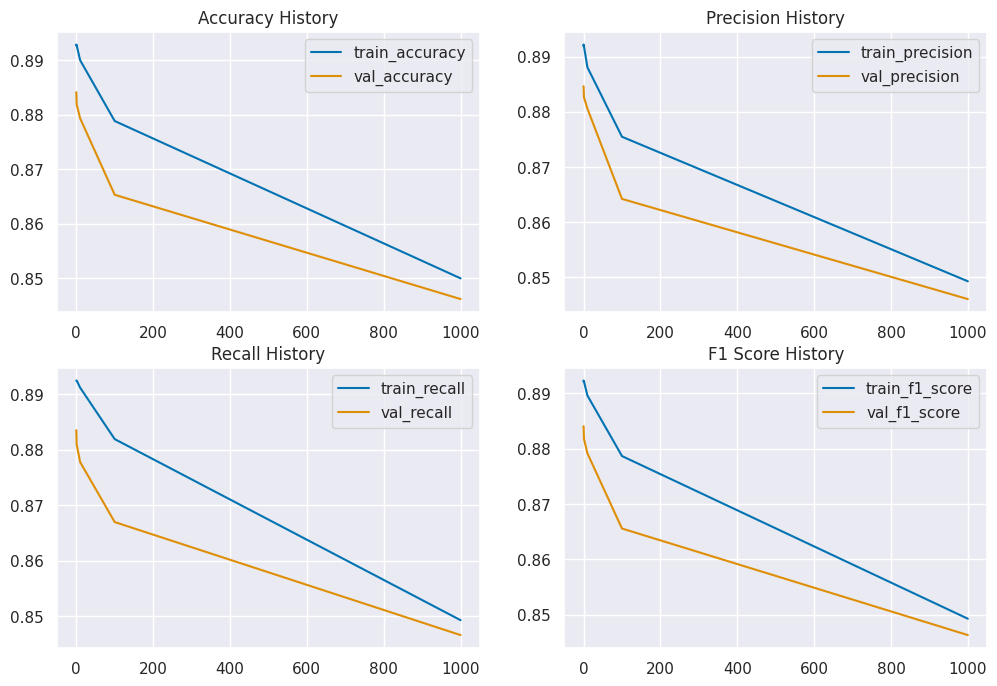

In [12]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axis[0, 0].plot(reg_alphas, train_accuracy_history, label='train_accuracy')
axis[0, 0].plot(reg_alphas, val_accuracy_history, label='val_accuracy')
axis[0, 0].set_title("Accuracy History")
axis[0, 0].legend()

axis[0, 1].plot(reg_alphas, train_precision_history, label='train_precision')
axis[0, 1].plot(reg_alphas, val_precision_history, label='val_precision')
axis[0, 1].set_title("Precision History")
axis[0, 1].legend()

axis[1, 0].plot(reg_alphas, train_recall_history, label='train_recall')
axis[1, 0].plot(reg_alphas, val_recall_history, label='val_recall')
axis[1, 0].set_title("Recall History")
axis[1, 0].legend()

axis[1, 1].plot(reg_alphas, train_f1score_history, label='train_f1_score')
axis[1, 1].plot(reg_alphas, val_f1score_history, label='val_f1_score')
axis[1, 1].set_title("F1 Score History")
axis[1, 1].legend()

plt.show()

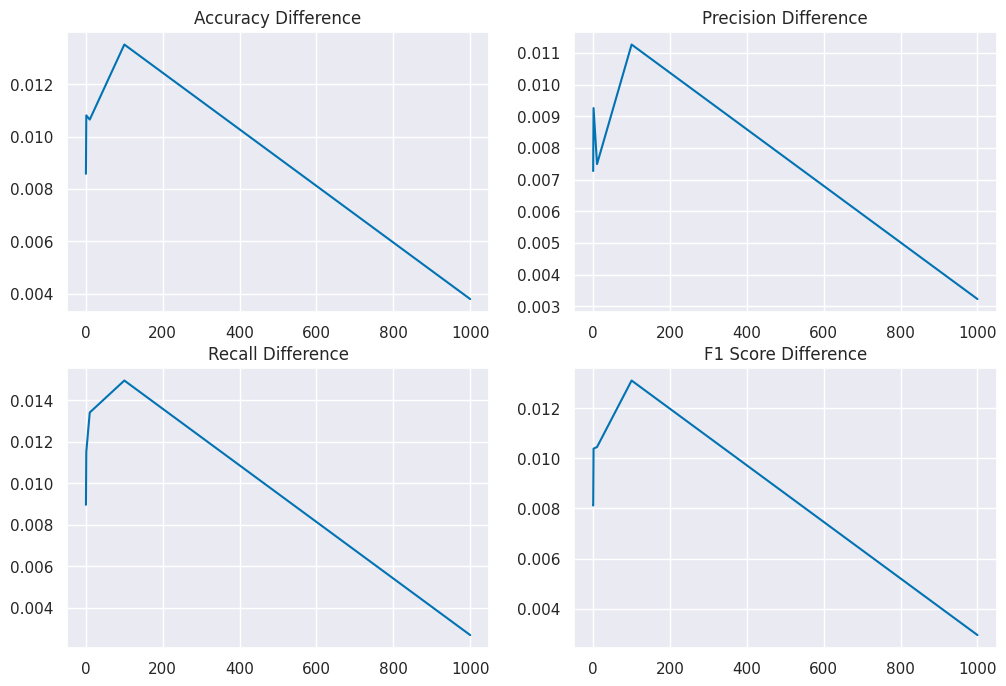

In [14]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axis[0, 0].plot(reg_alphas, np.array(train_accuracy_history)-np.array(val_accuracy_history))
axis[0, 0].set_title("Accuracy Difference")

axis[0, 1].plot(reg_alphas, np.array(train_precision_history)-np.array(val_precision_history))
axis[0, 1].set_title("Precision Difference")

axis[1, 0].plot(reg_alphas, np.array(train_recall_history)-np.array(val_recall_history))
axis[1, 0].set_title("Recall Difference")

axis[1, 1].plot(reg_alphas, np.array(train_f1score_history)-np.array(val_f1score_history))
axis[1, 1].set_title("F1 Score Difference")

plt.show()

Note it seems that model with minimal Ridge Regularization generalizes best from training to validation

In [15]:
# # # Final Score

clf = RidgeClassifier(alpha=1e-3)
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
best_results = classification_metrics(y_val, y_val_pred)
best_results

{'accuracy_score': 0.8841133397007322,
 'precision_score': np.float64(0.8846398980242193),
 'recall_score': np.float64(0.8835136855506047),
 'f1_score': np.float64(0.8840764331210191)}